In [ ]:
# Dataset : https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d rxsraghavagrawal/instagram-reach

  0% 0.00/16.9k [00:00<?, ?B/s]
100% 16.9k/16.9k [00:00<00:00, 29.7MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/instagram-reach.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
#importing necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import re
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [5]:
# reading the file 
df = pd.read_csv('instagram_reach.csv')

In [6]:
# checking top 5 row of dataset
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [7]:
# Dropping unnecessary columns
df.drop(['Unnamed: 0','S.No'], axis=1,inplace=True)

In [8]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [9]:
# Checking shape of dataset
df.shape

(100, 6)

In [10]:
# Checking details information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [11]:
# Checking null values
df.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [12]:
# Dropping null values
df = df.dropna()

In [13]:
df.isnull().sum()

USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [14]:
Time_since_posted_in_hours=[]

for i in df['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))
se = pd.Series(Time_since_posted_in_hours)
df['Times since posted (hours)'] = se.values
df['Times since posted (hours)'] = pd.to_numeric(df['Times since posted (hours)'])
df = df.drop('Time since posted', axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   USERNAME                    94 non-null     object
 1   Caption                     94 non-null     object
 2   Followers                   94 non-null     int64 
 3   Hashtags                    94 non-null     object
 4   Likes                       94 non-null     int64 
 5   Times since posted (hours)  94 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ KB


# Analyzing the dataset of Instagram Reach

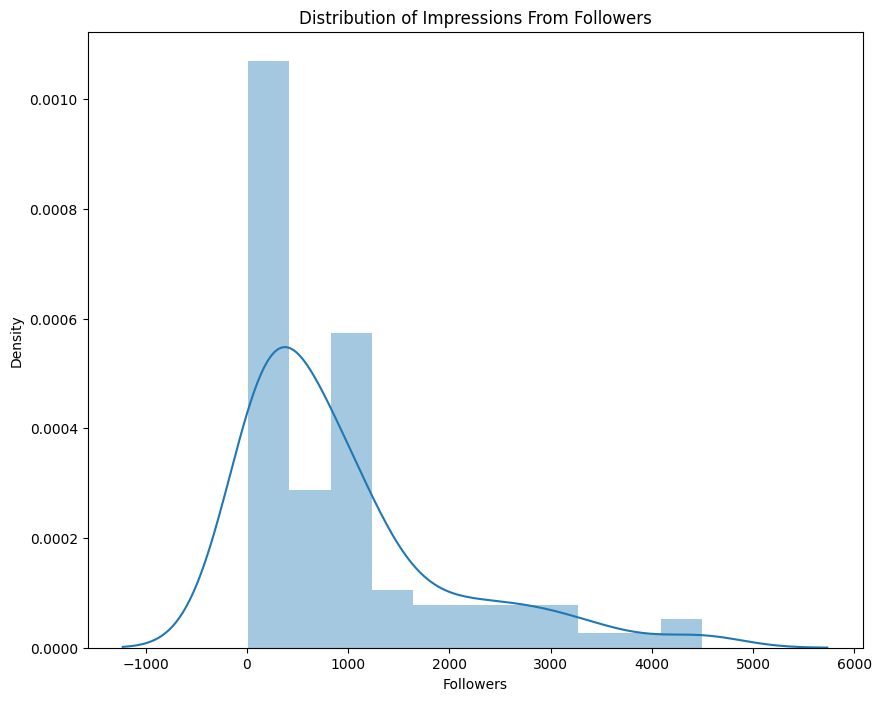

In [16]:
## Distribution of Impressions From Followers

plt.figure(figsize=(10, 8))

plt.title("Distribution of Impressions From Followers")
sns.distplot(df['Followers'])
plt.show()

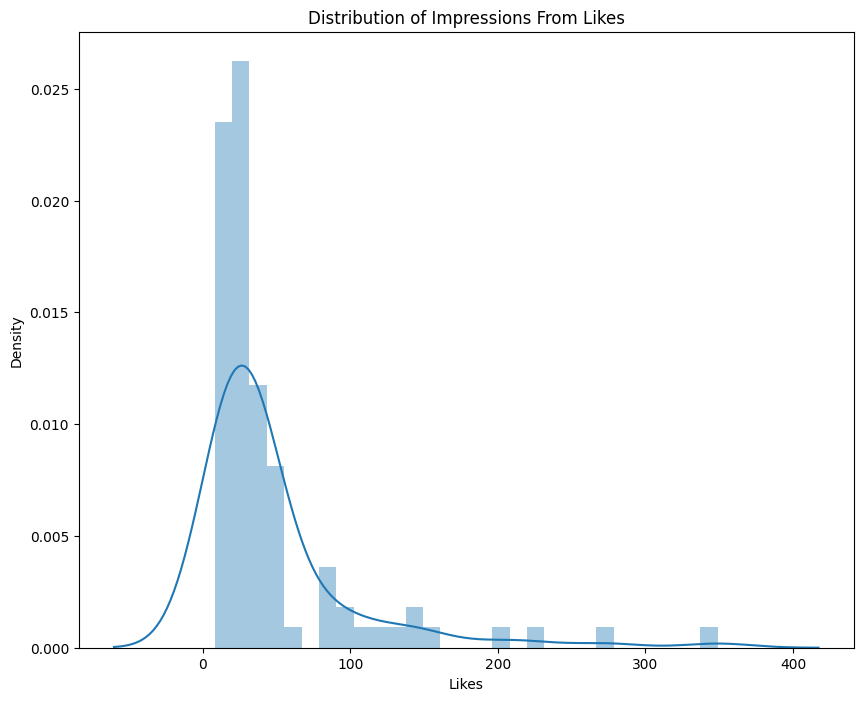

In [17]:
## Distribution of Impressions From Likes

plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Likes")
sns.distplot(df['Likes'])
plt.show()

In [18]:
## Plotting Scatter-plot for showing Relationship Between Likes and Followers 

figure = px.scatter(data_frame = df, x="Likes",
                    y="Followers", trendline="ols", 
                    title = "Relationship Between Likes and Followers")
figure.show()

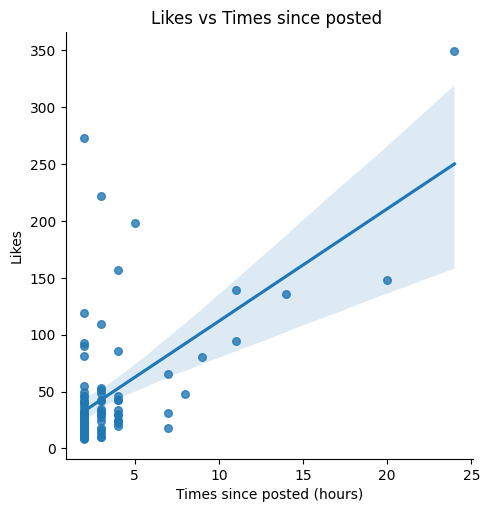

In [19]:
sns.lmplot(x='Times since posted (hours)', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()

# Modelling

In [20]:
#Define x variables and y variable
x = df[['Followers', 'Times since posted (hours)']]
y = df['Likes']
df.head()

#Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
#Fit the model and predict the value of test set
model = XGBRegressor()
model.fit(X_train, y_train)

#Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#Evaluate the model
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#Absolute MAE
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 18.272 (8.974)
